>This covers sections 1 and 2 of the accompanying paper

>Please refer there for in-depth motivation for the functions constructed

>Also refer there for some worked examples

>See list below for libraries needed to run this code

In [2]:
import numpy as np
import networkx as nx
import scipy
import matplotlib.pyplot as plt
import random

>Follows a function that runs one iteration of the model

In [3]:
# Function for a disturbance simulation. 
# The variable initial_inf assigns the last initial_inf nodes as exposed to begin the model
# time_max= An upper bound for how many steps the model runs. The model automatically terminates if it reaches a steady state before time_max
# adj_matrix = the adjecency matrix for the network we run, input is an np matrix
# healthy1 = transition probability from state Healthy to state Exposed
# healthy2 = transition probability from state Healthy to state Infected
# exposed = transition probability from state Exposed to state Recovered
# infected1 = transition probability from state Infected to state Recovered
# infected2 = transition probability from state Infected to state Dead
# Recovered = transition probability from state Recovered to state Healthy
# Output: a list of the form [Timeline, avalanche length]
# Timeline = timeline of the states ie. a np matrix with each row the states of the nodes at given time step
# avalanche length : length of avalanche, an integer


def virus_simulation(time_max,adj_matrix,initial_inf, healthy1, healthy2, exposed, infected1, infected2, recovered):
    #state 0= healthy =blue
    #state1= exposed = yellow
    #state2= infected = red
    #state3= recovered = green
    #state4 =dead = black
    n=len(adj_matrix)
    state=np.zeros(n)
    timeline=state
    temp=state.tolist()
    state[-initial_inf-1:-1]=1
    time=0
    h=0
    while h<1:
        time+=1
        timeline=np.append(timeline,state,axis=0)
        state_new=state.copy()
        for j in range(n):
            count=0
            temp=state[j]
            if temp==0:
                for w in range(n):
                    if adj_matrix[j,w]==1 and count==0 and state[w] in [1,2]:
                        if np.random.binomial(1, healthy2)==1:
                            state_new[j]=2
                            count+=1
                        elif np.random.binomial(1, healthy1)==1:
                            state_new[j]=1
                            count+=1
            elif temp==1:
                if np.random.binomial(1, exposed)==1:
                    state_new[j]=3
            elif temp==2:
                if np.random.binomial(1, infected2)==1:
                    state_new[j]=4
                elif np.random.binomial(1, infected1)==1:
                    state_new[j]=3
            elif temp==3:
                 if np.random.binomial(1, recovered)==1:
                    state_new[j]=0
            else:
                state_new[j]=4
        #truth=state==state_new
        state=state_new
        if 1 not in state_new and 2 not in state_new and time>=2:
            h=1
        if time==time_max:
            h=1
    timeline=np.append(timeline,state)
    time_steps=len(np.split(timeline,time+2))-2
    return(np.split(timeline,time+2),time_steps)

In [4]:
# A function that visualizes the timeline of virus_simulation()
# inputs: timeline from virus_simulation(), 
#outputs: a graph that shows the #nodes at each state at each time step 
#and a vector that contains the #nodes at each state for all states
# this function was NOT used in the presentation or in the paper

def time_analysis(timeline):
    healthy=[]
    exposed=[]
    infected=[]
    recovered=[]
    dead=[]
    for i in range(len(timeline)):
        temp=timeline[i].tolist()
        healthy.append(temp.count(0))
        exposed.append(temp.count(1))
        infected.append(temp.count(2))
        recovered.append(temp.count(3))
        dead.append(temp.count(4))
    x = np.linspace(0, len(timeline), len(timeline))
    plt.plot(x, healthy, color='blue')
    plt.plot(x, exposed, color='yellow')
    plt.plot(x, infected, color='red')
    plt.plot(x, recovered, color='green')
    plt.plot(x, dead, color='black')
    plt.show()
    return(healthy,exposed,recovered,infected,dead)

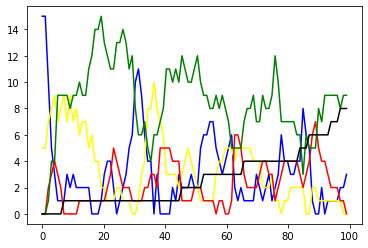

In [5]:
# example, run the following code
k=nx.barabasi_albert_graph(20,2)
A=nx.to_numpy_matrix(k)
Timeline=virus_simulation(100,A,5,0.6,0.3,0.15,0.2,0.02,0.1)
Picture=time_analysis(Timeline[0])

>>This section covers the experiments presented in the paper. For all experiments the last 3 nodes are turned into exposed to start

>> The model parameters have also been hard coded as follows:

>> healthy1 = 0.4, healthy2 = 0.4, exposed = 0.3, infected1 = 0.3, infected2 = 0.1, recovered = 0.1

In [6]:
# experiment to produce the avalance plot of section 2.1
# inputs: A = the adjecency matrix of the network, time_max = maximum number of transition iterations before halting virus_simulation(), iterations= # of times you run the experiment
# outputs: a vector of the avalance of each iteration


def experiment1(A,time_max,iterations):
    avalanche=[]
    for i in range(iterations):
        Timeline=virus_simulation(time_max,A,3,0.4,0.4,0.3,0.3,0.1,0.1) 
        avalanche.append(Timeline[1])
    return avalanche

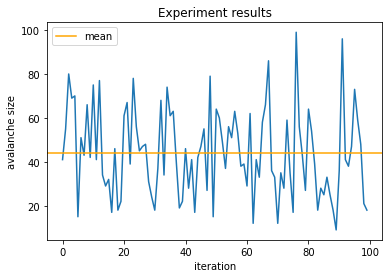

standard deviation= 19.936747477961397
mean= 44.19


In [7]:
# example: run the following code:
k=nx.barabasi_albert_graph(53,3)
A=nx.to_numpy_matrix(k)
time_max=1000
avalanche=experiment1(A,time_max,100)
mean=np.mean(avalanche)
plt.plot(avalanche)
plt.axhline(y=mean, color='orange',label='mean', linestyle='-')
plt.xlabel('iteration')
plt.ylabel('avalanche size')
plt.title('Experiment results')
plt.legend()
plt.show()
print('standard deviation=',np.sqrt(np.var(avalanche)))
print('mean=',mean)

In [27]:
#Experiment2, used to make plots for avalance in section 2.2 of the paper
# inputs: A= adjecency matrix (minimum size 53x53), each iteration takes a fixed subgraph of A and runs virus_analysis many times
# time_max = time that halts virus_simulation(), iterations= # of size increases in network (each adds 10 nodes),
# sub_iterations= # times you run each iteration of a subgraph of A
# outputs: mean avalance value of every iteration (mean value of sub_iteration number of times) in form of a list,
# variance of said avalance value in form of a list

def experiment2(A,time_max, iterations, sub_iterations):
    mean=[]
    var=[]
    for i in range(iterations):
        print('currently on trial:',i) # as some of the experiments can take a lot of time, printing current iteration indicator
        A_temp=A[0:(50+i*10+3),0:(50+i*10+3)]
        avalanche=[]
        for j in range(sub_iterations):
            Timeline=virus_simulation(time_max,A_temp,3,0.4,0.4,0.3,0.3,0.1,0.1) 
            avalanche.append(Timeline[1])
        mean.append(np.mean(avalanche))
        var.append(np.var(avalanche))
    return([mean,var])


currently on trial: 0
currently on trial: 1
currently on trial: 2
currently on trial: 3
currently on trial: 4


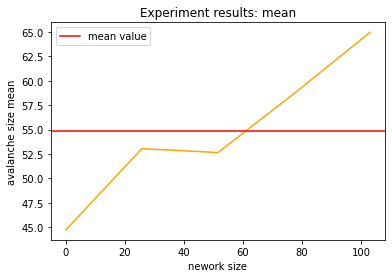

mean,std of the mean: 54.80799999999999 6.747581492653496


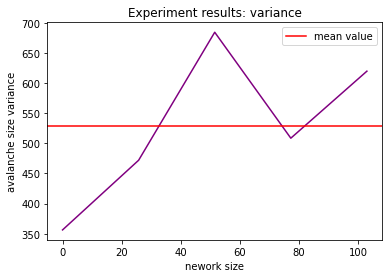

mean,std of the variance: 528.2812799999999 6.747581492653496


In [28]:
# example: run the following code:
k=nx.barabasi_albert_graph(103,3)
A=nx.to_numpy_matrix(k)
time_max=1000
iterations=5
sub_iterations=100
Statistics=experiment2(A,time_max, iterations, sub_iterations)
mean=Statistics[0]
var=Statistics[1]
x = np.linspace(0,50+10*iterations+3 , iterations)
plt.plot(x,mean, color='orange')
m=np.mean(mean)
plt.axhline(y=m, color='red',label='mean value', linestyle='-')
plt.xlabel('nework size')
plt.ylabel('avalanche size mean')
plt.title('Experiment results: mean')
plt.legend()
plt.show()
print('mean,std of the mean:', m, np.sqrt(np.var(mean)))
m=np.mean(var)
x = np.linspace(0,50+10*iterations+3 , iterations)
plt.plot(x,var, color='purple')
plt.axhline(y=m, color='red',label='mean value', linestyle='-')
plt.xlabel('nework size')
plt.ylabel('avalanche size variance')
plt.title('Experiment results: variance')
plt.legend()
plt.show()
print('mean,std of the variance:', m, np.sqrt(np.var(mean)))

In [32]:
# experiment to get output energy as per section 2.1
# inputs: A = adjecency matrix, time_max = time to halt virus_simulation, iterations= # iterations
# outputs: output energy of each iteration as list

def experiment3(A,time_max,iterations):
    e_out=[]
    for i in range(iterations):
        Timeline=virus_simulation(time_max,A,3,0.4,0.4,0.3,0.3,0.1,0.1)
        out_temp=Timeline[0][-1].tolist()
        e_out.append(out_temp.count(4))
    return e_out



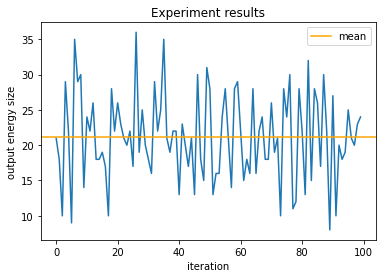

standard deviation= 6.157686253780718
mean= 21.23


In [33]:
#example, run the following code:
k=nx.barabasi_albert_graph(53,3)
A=nx.to_numpy_matrix(k)
time_max=1000
e_out=experiment3(A,time_max,100)
mean=np.mean(e_out)
plt.plot(e_out)
plt.axhline(y=mean, color='orange',label='mean', linestyle='-')
plt.xlabel('iteration')
plt.ylabel('output energy size')
plt.title('Experiment results')
plt.legend()
plt.show()
print('standard deviation=',np.sqrt(np.var(e_out)))
print('mean=',mean)


In [36]:
#Experiment4, used to make plots for output energy as in section 2.2 of the paper
# inputs: A= adjecency matrix (minimum size 53x53), each iteration takes a fixed subgraph of A and runs virus_analysis many times
# time_max = time that halts virus_simulation(), iterations= # of size increases in network (each adds 10 nodes),
# sub_iterations= # times you run each iteration of a subgraph of A
# outputs: mean output energy value of every iteration (mean value of sub_iteration number of times) as a list, 
# variance of said output energy value as a list


def experiment4(A,time_max, iterations, sub_iterations):
    e_out=[]
    e_var=[]
    for i in range(iterations):
        print('currently on trial:',i) # we are printing this, as some experiments take a lot of time
        A_temp=A[0:(50+i*10+3),0:(50+i*10+3)]
        out_temp=[]
        for j in range(sub_iterations):
            Timeline=virus_simulation(time_max,A_temp,3,0.4,0.4,0.3,0.3,0.1,0.1) 
            out_temp2=Timeline[0][-1].tolist()
            out_temp.append(out_temp2.count(4))
        e_out.append(np.mean(out_temp))
        e_var.append(np.var(out_temp))
    return([e_out,e_var])



currently on trial: 0
currently on trial: 1
currently on trial: 2
currently on trial: 3
currently on trial: 4


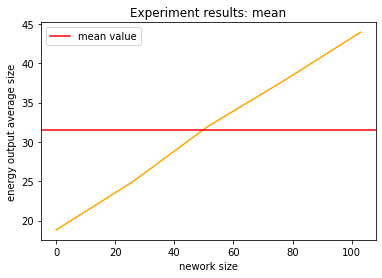

mean,std of the mean: 31.5 8.94346241676008


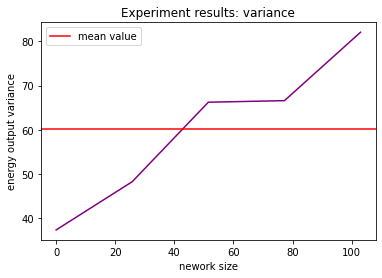

mean,std of the variance: 60.10447999999999 15.591270405762323


In [37]:
#example, run the following code:

k=nx.barabasi_albert_graph(103,3)
A=nx.to_numpy_matrix(k)

time_max=1000
iterations=5
sub_iterations=100
Statistics=experiment4(A,time_max, iterations, sub_iterations)

mean=Statistics[0]
var=Statistics[1]
x = np.linspace(0,50+10*iterations+3 , iterations)
plt.plot(x,mean, color='orange')
m=np.mean(mean)
plt.axhline(y=m, color='red',label='mean value', linestyle='-')
plt.xlabel('nework size')
plt.ylabel('energy output average size')
plt.title('Experiment results: mean')
plt.legend()
plt.show()
print('mean,std of the mean:', m, np.sqrt(np.var(mean)))

m=np.mean(var)
x = np.linspace(0,50+10*iterations+3 , iterations)
plt.plot(x,var, color='purple')
plt.axhline(y=m, color='red',label='mean value', linestyle='-')
plt.xlabel('nework size')
plt.ylabel('energy output variance')
plt.title('Experiment results: variance')
plt.legend()
plt.show()
print('mean,std of the variance:', m, np.sqrt(np.var(var)))